# Imports

In [1]:
from pycbc import distributions
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt
import numpy as np
import pylab
from tqdm.notebook import tqdm
from gwpy.timeseries import TimeSeries
import pandas as pd
import os
import csv
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
from pycbc.catalog import Merger
import pylab
from pycbc.filter import resample_to_delta_t, highpass
import pycbc.psd
import pycbc.noise

# Marginal Events Data Download

In [3]:
marginal_events =  ["170720",
                    "170705",
                    "170630",
                    "170616",
                    "170423",
                    "170412",
                    "170405",
                    "170219",
                    "170208",
                    "161217",
                    "161202",
                    "151116",
                    "151012.2",
                    "151008",
                    "GW190531_023648",
                    "GW190426_152155",
                    "GW200311_103121",
                    "200219_201407",
                    "GW200201_203549",
                    "200121_031748",
                    "GW200105_162426",
                    "GW191118_212859",
                    "200214_224526",
                    "200114_020818",
                    "191225_215715",
                    "191223_014159",
                    "190924_232654"]

In [4]:
directory = "/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/LIGO Detector Data/Marginal events/"

In [ ]:
print(len(marginal_events))

In [ ]:
# Code to fetch strain data from GWOSC server

for i in tqdm(range(len(marginal_events))):

    gps = event_gps(marginal_events[i])
    start = int(gps) - 15
    end = int(gps) + 15

    if i == 19:
        data = TimeSeries.fetch_open_data('H1', start, end)

    else:
        data = TimeSeries.fetch_open_data('L1', start, end)

    data.write(directory + "Original signals/"+marginal_events[i]+".txt")       
    

In [5]:
# Merging Original Strain Data Templates into single file

path = directory + "Original signals/"
files= os.listdir(path)
f = open(directory + 'Original_signals.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/27 [00:00<?, ?it/s]

In [7]:
# Processed strain data

for i in tqdm(range(len(marginal_events))):
    gps = event_gps(marginal_events[i])
    
    data = TimeSeries.read(directory + "Original signals/"+marginal_events[i]+".txt")    
    data = TimeSeries.to_pycbc(data)
    data = data.whiten(4, 4)
    data = data.highpass_fir(30, 512).lowpass_fir(250, 512)
    data = data.time_slice(gps - 2, gps + 2)
    
    data = TimeSeries.from_pycbc(data)
    data.write(directory + "Processed signals/"+marginal_events[i]+".txt")    
    

  0%|          | 0/27 [00:00<?, ?it/s]

In [8]:
# Merging Processed Strain Data Templates into single file

path = directory + "Processed signals/"
files= os.listdir(path)
f = open(directory + 'Processed_Marginal_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/27 [00:00<?, ?it/s]

In [9]:
# Another way of processing the strain data
# Scaled Processed strain data

for i in tqdm(range(len(marginal_events))):
    gps = event_gps(marginal_events[i])
    
    data = TimeSeries.read(directory + "Original signals/"+marginal_events[i]+".txt")    
    data = TimeSeries.to_pycbc(data)
    data = data.whiten(4, 4)
    data = data.highpass_fir(30, 512).lowpass_fir(250, 512)
    data = data.time_slice(gps - 2, gps + 2)
    
    data = TimeSeries.from_pycbc(data)
    data = (data/(max(data.max(), np.abs(data.min()))))*1.25
    data *= 0.4
    data *= 1e-17

    data.write(directory + "Scaled Processed signals/"+marginal_events[i]+".txt")    
    

  0%|          | 0/27 [00:00<?, ?it/s]

In [10]:
# Merging Scaled Processed Strain Data Templates into single file

path = directory + "Scaled Processed signals/"
files= os.listdir(path)
f = open(directory + 'Scaled_Processed_Marginal_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/27 [00:00<?, ?it/s]

In [11]:
# Another way of processing the strain data
## Scaled Sliced strain data

for i in tqdm(range(len(marginal_events))):
    gps = event_gps(marginal_events[i])
    
    data = TimeSeries.read(directory + "Original signals/"+marginal_events[i]+".txt")    
    data = TimeSeries.to_pycbc(data)
    data = data.time_slice(gps - 2, gps + 2)
    
    data = TimeSeries.from_pycbc(data)
    data = (data/(max(data.max(), np.abs(data.min()))))*1.25
    data *= 0.4
    data *= 1e-17

    data.write(directory + "Scaled Sliced signals/"+marginal_events[i]+".txt")    
    

  0%|          | 0/27 [00:00<?, ?it/s]

In [12]:
# Merging Scaled Sliced Strain Data Templates into single file

path = directory + "Scaled Sliced signals/"
files= os.listdir(path)
f = open(directory + 'Scaled_Sliced_Marginal_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/27 [00:00<?, ?it/s]

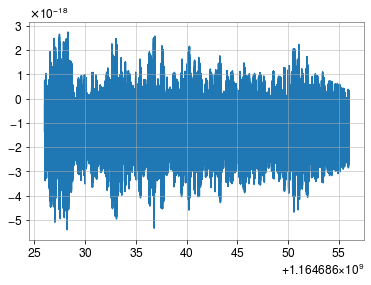

In [5]:
# Visualization of the Processed Strain Data
# Duration of the data is 4s, i.e. a 2s interval around the merger

i = 10
data = TimeSeries.read(directory + "Original signals/"+marginal_events[i]+".txt")
plt.plot(data)